# **Bullet Train Hackathon**
--------------
## **Context**
--------------

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine learning exercise aims to determine the relative importance of each parameter with regards to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is published in a file named **‘Traveldata_train.csv’**.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled **‘Surveydata_train.csv’**.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled **‘Overall_Experience’**. 

----------------
## **Objective**
----------------

Understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

----------------
## **Goal**
----------------

The goal of the problem is to **predict whether a passenger was satisfied or not** considering his/her overall experience of traveling on the Shinkansen Bullet Train.

-----------------------------
## **Dataset** 
-----------------------------

The problem consists of 2 separate datasets: **Travel data** & **Survey data**. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

* Train_Data
* Test_Data

**Target Variable**: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The **training set** can be used to build your machine learning model. The training set has labels for the target column - **Overall_Experience**.

The **testing set** should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the **‘Overall_Experience’** level for each participant.

**Data Dictionary**:

All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

## **Importing the necessary libraries and overview of the dataset**

In [1]:
# !pip install pandas_profiling
# !pip install ipywidgets
# !pip install catboost
# !pip install hyperopt
# !pip install multiprocessing

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import multiprocessing

from sklearn import datasets

from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV

## **Preparing the dataset**

### Loading the dataset

In [3]:
df_travel_train = pd.read_csv(r'C:\Users\Usuario\Desktop\DATA SCIENCE\Great_Learning\Hackathon\Datasets\Train and Test\Traveldata_train_(2).csv')
df_travel_test = pd.read_csv(r'C:\Users\Usuario\Desktop\DATA SCIENCE\Great_Learning\Hackathon\Datasets\Train and Test\Traveldata_test_(2).csv')
df_survey_train = pd.read_csv(r'C:\Users\Usuario\Desktop\DATA SCIENCE\Great_Learning\Hackathon\Datasets\Train and Test\Surveydata_train_(2).csv')
df_survey_test = pd.read_csv(r'C:\Users\Usuario\Desktop\DATA SCIENCE\Great_Learning\Hackathon\Datasets\Train and Test\Surveydata_test_(2).csv')

### Merging the datasets and checking the first 5 observations

In [4]:
df_train = pd.merge(df_travel_train, df_survey_train, on = 'ID', how = 'inner')
df_test = pd.merge(df_travel_test, df_survey_test, on = 'ID', how = 'inner')

In [5]:
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [6]:
df_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


### Checking the info of the data

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

**Observations:**

* There are **94,379 observations and 25 columns** in the train data.
* The **ID, Age, Travel_Distance, Departure_Delay_in_Mins, Arrival_Delay_in_Mins and Overall_Experience columns** are numeric columns while the rest are object type columns.
* Only the **ID, Travel_Class, Travel_Distance, Overall_Experience and Seat_Class columns** don't have missing values.

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

**Observations:**

* There are **35,602 observations and 24 columns** in the test data.
* The **ID, Age, Travel_Distance, Departure_Delay_in_Mins, Arrival_Delay_in_Mins and Overall_Experience columns** are numeric columns while the rest are object type columns.
* The **ID, Travel_Class, Travel_Distance and the Seat_Class columns** don't have missing values.

## **Exploratory Data Analysis**

### **Univariate Analysis**

#### **Summary statistics**

In [9]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Gender,94302,2,Female,47815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,85428,2,Loyal Customer,69823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,94346.0,NaN,NaN,NaN,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Type_Travel,85153,2,Business Travel,58617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,94379,2,Eco,49342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,94379.0,NaN,NaN,NaN,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,NaN,NaN,NaN,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,NaN,NaN,NaN,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


**Observations:**

* There are more observations from the female gender.
* Loyal is the most type of customer with 85,428 observations.
* The average age of the customers is ~39 years old.
* Business is the most type of travel with 85,153 observations.
* Eco is the most travel class with 49,342 observations.
* The average travel distance is around 1978.88.
* The departure delay average is around 14 minutes. Approximately 25% of the customers had delays on their departure.
* The arrival delay averga is around 15 minutes. Approximately 25% of the customers had delays in their arrival.
* Approximately more than 50% of the customers had a overall experience classified as 'Satisfied'.
* The Seat comfort was acceptable most of the times.
* The seat class was Green Car most of the times with 47,435 observations.
* The arrival time convenient was good most of the times.
* The catering was acceptable on most of the times for the customers.
* The platform locations was manageable for the customers on most of the times.
* The rest of the survey rating was Good on most of the times.

In [10]:
df_test.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,35602.0,NaN,NaN,NaN,99917801.5,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Gender,35572,2,Female,18069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,32219,2,Loyal Customer,26349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,35591.0,NaN,NaN,NaN,39.446995,15.137554,7.0,27.0,40.0,51.0,85.0
Type_Travel,32154,2,Business Travel,22313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,35602,2,Eco,18473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,35602.0,NaN,NaN,NaN,1987.151761,1024.308863,50.0,1360.0,1929.0,2559.0,6868.0
Departure_Delay_in_Mins,35573.0,NaN,NaN,NaN,14.880696,37.895453,0.0,0.0,0.0,13.0,978.0
Arrival_Delay_in_Mins,35479.0,NaN,NaN,NaN,15.308802,38.531293,0.0,0.0,0.0,13.0,970.0
Seat_Comfort,35580,6,Acceptable,8003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**

* In this case the seat class was rated as 'Ordinary' most of the times.
* We have the same results in the summary statistics as the train dataset, but with less observations.

#### **Checking the distribution of the target variable**

In [11]:
df_train['Overall_Experience'].value_counts(normalize = True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

**Observations:**

* In our target variable we have a 54% of the people that had rated their travel experience as **'Satisfied'**.

In [12]:
# Creating numerical columns
num_cols = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'Overall_Experience']

# Creating categorical variables 
cat_cols = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient',
           'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
           'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

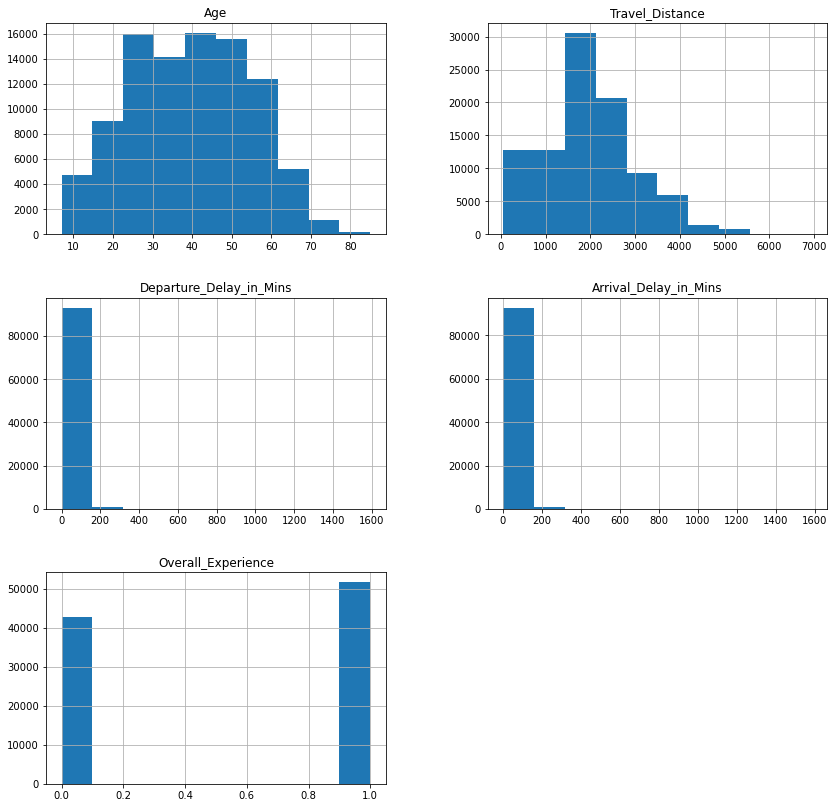

In [13]:
# Creating histograms
df_train[num_cols].hist(figsize = (14, 14))

plt.show()

**Observations:**

* **The Age distribution is close to a normal distribution**, with the majority of passengers between the ages of 22 and 53.
* **The Travel_Distance variable distribution is right-skewed** and has a peak around 1800.
* **The Departure_Delay_in_Mins and Arrival_Delay_in_Mins variables distributions** shows that on most of the times they are no delays in the departures and in the arrivals.
* **There are more observations of passengers with a Satisfied Experience**.

### Univariate analysis for categorical variables

In [14]:
for i in cat_cols:
    print(df_train[i].value_counts(normalize = True))
    
    print('*' * 40)

Female    0.507041
Male      0.492959
Name: Gender, dtype: float64
****************************************
Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: Customer_Type, dtype: float64
****************************************
Business Travel    0.688373
Personal Travel    0.311627
Name: Type_Travel, dtype: float64
****************************************
Eco         0.522807
Business    0.477193
Name: Travel_Class, dtype: float64
****************************************
Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: Seat_Comfort, dtype: float64
****************************************
Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
****************************************
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor        

**Observations:**

* There is approximately the same amount of males and females in the data.
* Around 81% of the customers are classified as Loyals. 
* Business is the most type of travel with ~68%.
* Eco and Business travel class share almost the same amount of observations.
* Green Car and Ordinary seat class share almost the same amount of observations.
* For the rest of the surveys features 'Good' was the most type of rating.

### Bivariate and Multivariate analysis

#### We have analyzed different categorical and numerical variables. Let's now check how does passenger satisfaction rate is related with other categorical variables

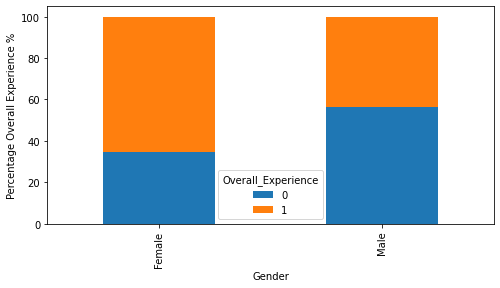

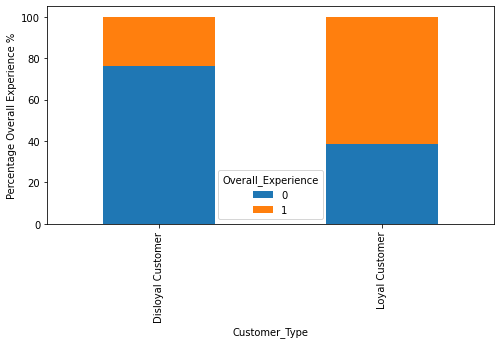

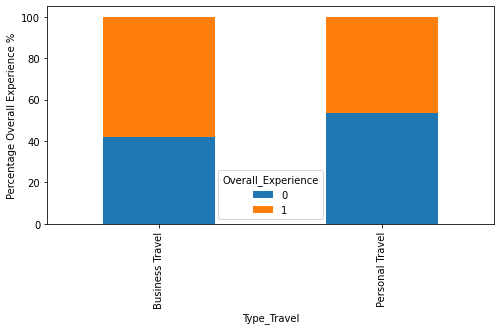

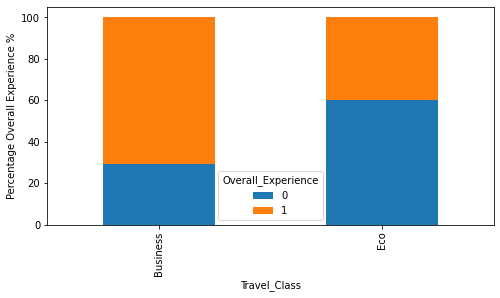

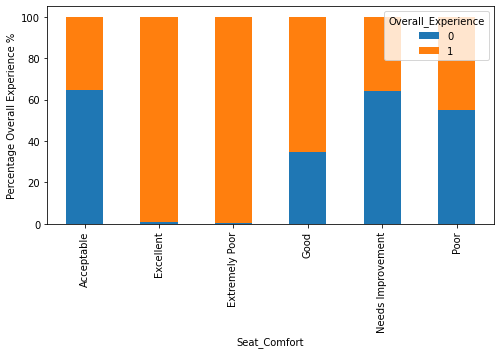

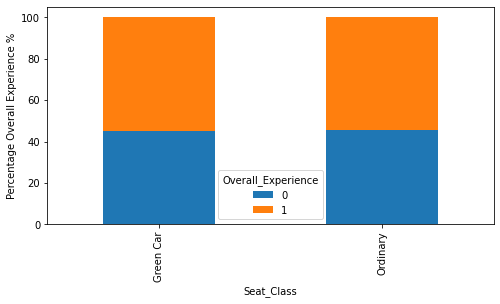

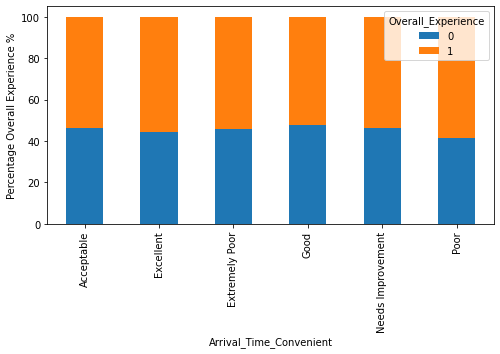

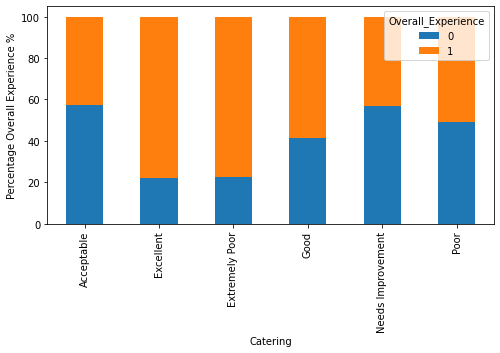

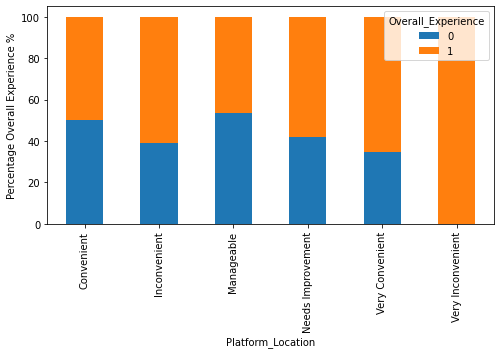

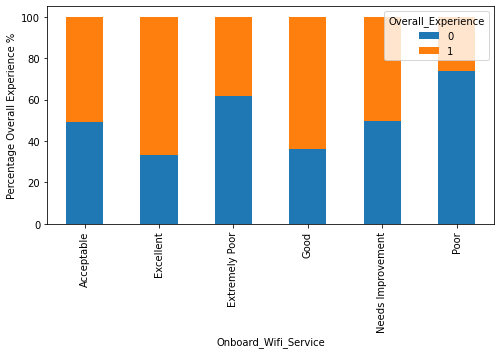

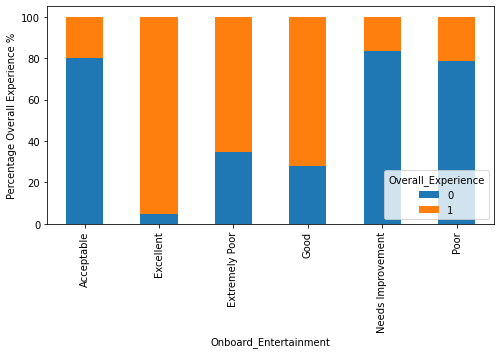

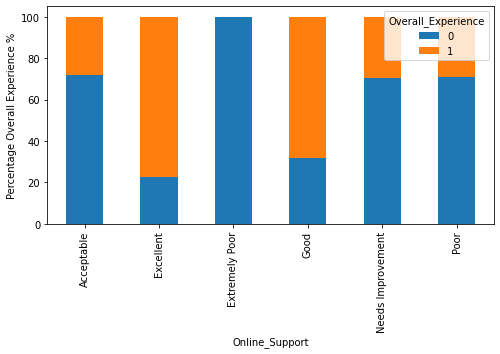

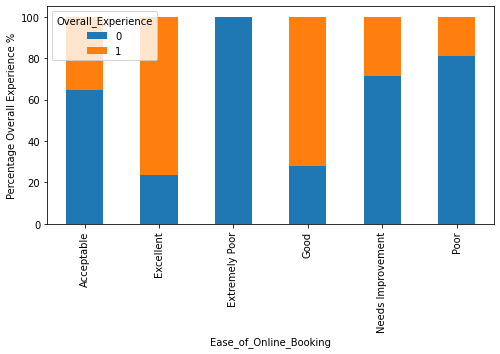

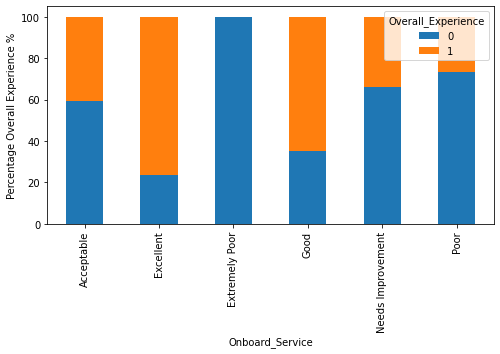

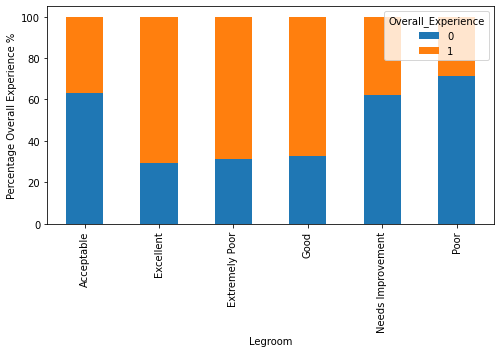

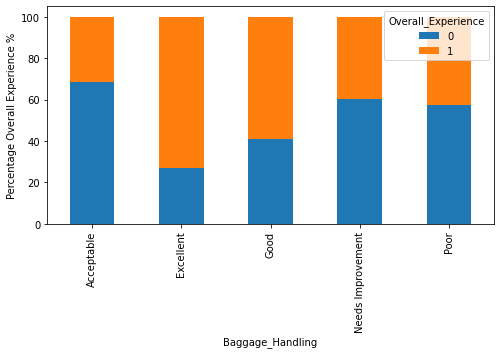

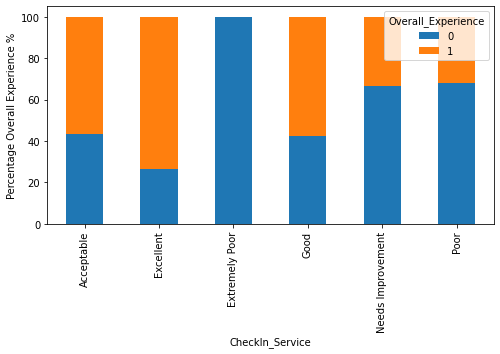

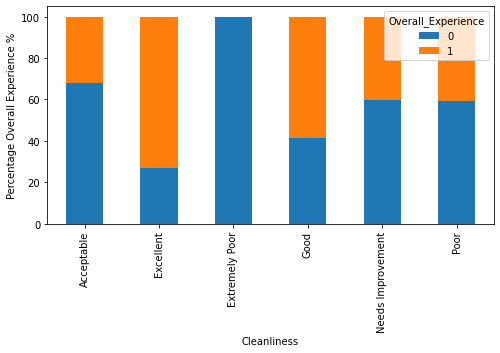

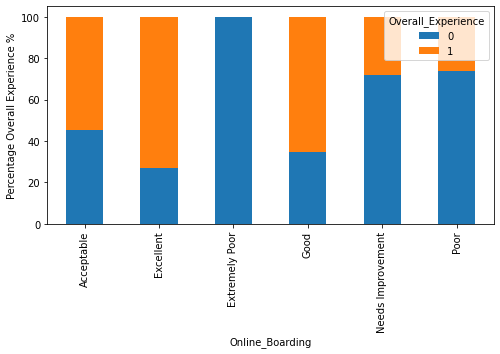

In [15]:
for i in cat_cols:
    if i != 'Overall_Experience':
        (pd.crosstab(df_train[i], df_train['Overall_Experience'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Overall Experience %')

**Observations:**

* Females have more than 60% rate of Satisfied Experience compared to Males that have 40% rate approximately.
* The Loyal customers have a Satisfied Experience rate of 60% approximately.
* The Travel class of Business has a 70% of Satisfied Experience rate.
* There is almost 100% of rate in Satisfied Experience when the seat comfort is excellent and extremely poor.
* There is almost 100% of rate in Satisfied Experience when the onboard entertainment is rated as 'Excelent'.
* There is a 0% of rate in Satisfied Experience when the Online Support, Ease of online booking, Onboard service, Checkin service, Cleanliness and Online boarding are rated as 'Extremely Poor'.

## Treating null values

### Making a copy of the datasets

In [16]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

### Treating missing values for categorical variables

In [17]:
null_cols = ['Gender', 'Customer_Type', 'Type_Travel', 'Seat_Comfort', 'Arrival_Time_Convenient',
           'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking',
           'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

In [18]:
def treat_missing_categorical(df, cols):
    """
    Treats missing values in categorical columns by creating a new category for missing values.
    
    Parameters:
    df (pandas.DataFrame): The dataframe to be treated.
    cols (list): A list of column names to be treated.
    
    Returns:
    df (pandas.DataFrame): The treated dataframe.
    """
    
    # create a new category for missing values in each column
    for col in null_cols:
        df[col] = df[col].fillna('Missing')
    
    return df
treat_missing_categorical(df_train, null_cols)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,Missing,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0,0,...,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0,1,...,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,Male,Missing,63.0,Business Travel,Business,2794,0.0,0.0,1,...,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0,0,...,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good


In [19]:
treat_missing_categorical(df_test, null_cols)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,Missing,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,Missing,Acceptable,Excellent,Excellent,Excellent,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,Needs Improvement,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,Needs Improvement,...,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,Good,...,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,Excellent,...,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good


### Treating missing values for numerical variables

In [20]:
null_numcat = ['Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [21]:
def replace_with_mode(df, cols):
    for col in cols:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

In [22]:
replace_with_mode(df_train, null_numcat)

In [23]:
replace_with_mode(df_test, null_numcat)

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94379 non-null  object 
 2   Customer_Type            94379 non-null  object 
 3   Age                      94379 non-null  float64
 4   Type_Travel              94379 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94379 non-null  float64
 8   Arrival_Delay_in_Mins    94379 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94379 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  94379 non-null  object 
 13  Catering                 94379 non-null  object 
 14  Platform_Location     

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35602 non-null  object 
 2   Customer_Type            35602 non-null  object 
 3   Age                      35602 non-null  float64
 4   Type_Travel              35602 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35602 non-null  float64
 8   Arrival_Delay_in_Mins    35602 non-null  float64
 9   Seat_Comfort             35602 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  35602 non-null  object 
 12  Catering                 35602 non-null  object 
 13  Platform_Location        35602 non-null  object 
 14  Onboard_Wifi_Service  

## **Data preparation for modeling**

In [26]:
df_train.drop(['ID', 'Seat_Class'], axis = 1, inplace = True)

In [27]:
# Separating the target variable and other variables
X_train = df_train.drop(columns = 'Overall_Experience')
y_train = df_train['Overall_Experience']

In [28]:
X_dum = pd.get_dummies(X_train, drop_first = True)
corr_matrix = X_dum.corr()

In [29]:
threshold = 0.95
for col in corr_matrix.columns:
    for row, val in corr_matrix[col].iteritems():
        correlation = corr_matrix[col][row]
        if not col==row and correlation > threshold:
            print(f"{col}   and   {row}   correlation  = {correlation}")

Departure_Delay_in_Mins   and   Arrival_Delay_in_Mins   correlation  = 0.9589399248347382
Arrival_Delay_in_Mins   and   Departure_Delay_in_Mins   correlation  = 0.9589399248347382
Platform_Location_Missing   and   Onboard_Wifi_Service_Missing   correlation  = 1.0
Onboard_Wifi_Service_Missing   and   Platform_Location_Missing   correlation  = 1.0
Online_Support_Extremely Poor   and   CheckIn_Service_Extremely Poor   correlation  = 1.0
CheckIn_Service_Extremely Poor   and   Online_Support_Extremely Poor   correlation  = 1.0
Cleanliness_Missing   and   Online_Boarding_Missing   correlation  = 1.0
Online_Boarding_Missing   and   Cleanliness_Missing   correlation  = 1.0


In [30]:
Xtst_dum = pd.get_dummies(df_test, drop_first = True)
corr_matrix_test = Xtst_dum.corr()

In [31]:
threshold = 0.95
for col in corr_matrix_test.columns:
    for row, val in corr_matrix_test[col].iteritems():
        correlation = corr_matrix_test[col][row]
        if not col==row and correlation > threshold:
            print(f"{col}   and   {row}   correlation  = {correlation}")

Departure_Delay_in_Mins   and   Arrival_Delay_in_Mins   correlation  = 0.9606542173462682
Arrival_Delay_in_Mins   and   Departure_Delay_in_Mins   correlation  = 0.9606542173462682
Platform_Location_Missing   and   Onboard_Wifi_Service_Missing   correlation  = 1.0
Onboard_Wifi_Service_Missing   and   Platform_Location_Missing   correlation  = 1.0
Ease_of_Online_Booking_Extremely Poor   and   Online_Boarding_Extremely Poor   correlation  = 1.0
Cleanliness_Missing   and   Online_Boarding_Missing   correlation  = 1.0
Online_Boarding_Extremely Poor   and   Ease_of_Online_Booking_Extremely Poor   correlation  = 1.0
Online_Boarding_Missing   and   Cleanliness_Missing   correlation  = 1.0


### **Drop correlated columns**

In [32]:
def drop_correlated(data):
    to_drop = ['Platform_Location_Missing', 'CheckIn_Service_Extremely Poor', 'Cleanliness_Missing']
    return data.drop(to_drop, axis=1)
X = drop_correlated(X_dum)

In [33]:
def drop_correlated(data):
    to_drop = ['Platform_Location_Missing', 'Ease_of_Online_Booking_Extremely Poor', 'Cleanliness_Missing']
    return data.drop(to_drop, axis=1)
Xtst = drop_correlated(Xtst_dum)

In [34]:
features = list(X.columns)
features_tst = list(Xtst.columns)

#### **Checking the distribution of the target variable**

In [35]:
y_train.value_counts(normalize = True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

## **Model Building - Approach**

In [36]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted, digits=3))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.3f', xticklabels = ['Not Satisfied', 'Satisfied'], yticklabels = ['Not Satisfied', 'Satisfied'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [37]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size = 0.30, random_state = 1)

In [38]:
print("Shape of the training set: ", X_train.shape)   
print("Shape of the test set: ", X_test.shape)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (66065, 91)
Shape of the test set:  (28314, 91)
Percentage of classes in the training set:
1    0.545917
0    0.454083
Name: Overall_Experience, dtype: float64
Percentage of classes in the test set:
1    0.548386
0    0.451614
Name: Overall_Experience, dtype: float64


### **Decision Tree**

In [40]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     29999
           1      1.000     1.000     1.000     36066

    accuracy                          1.000     66065
   macro avg      1.000     1.000     1.000     66065
weighted avg      1.000     1.000     1.000     66065



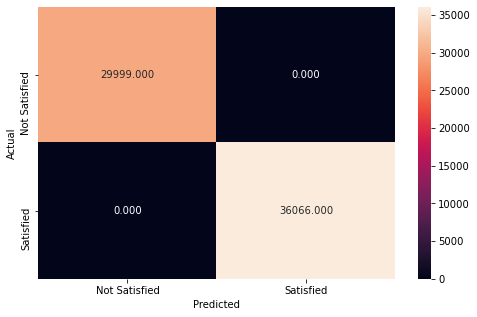

In [41]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0      0.918     0.919     0.919     12787
           1      0.934     0.932     0.933     15527

    accuracy                          0.926     28314
   macro avg      0.926     0.926     0.926     28314
weighted avg      0.926     0.926     0.926     28314



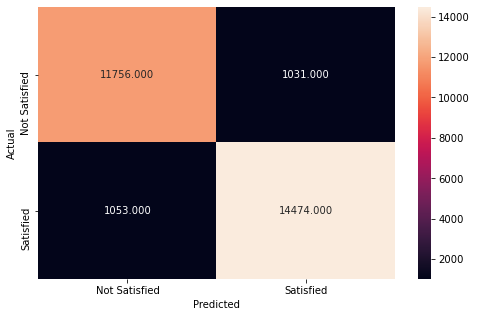

In [42]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

**Let's look at the feature importance of the tuned decision tree model**

In [43]:
# Importance of features in the tree building
def show_importance(d_tree, thresh_hold=0, data=X_train):
    importance = pd.DataFrame(d_tree.feature_importances_, columns = ["Imp"], index = data.columns).sort_values(by = 'Imp', ascending = False)
    print (importance)
    print('0 importance features:')
    return importance[importance['Imp']<=thresh_hold], importance[importance['Imp']>thresh_hold]
to_drop, to_keep = show_importance(d_tree, 0.001)
to_drop.index.astype(str).values

                                          Imp
Onboard_Entertainment_Excellent      0.198396
Onboard_Entertainment_Good           0.191581
Seat_Comfort_Excellent               0.069463
Seat_Comfort_Extremely Poor          0.057607
Seat_Comfort_Good                    0.040721
...                                       ...
Onboard_Entertainment_Missing        0.000000
Onboard_Wifi_Service_Extremely Poor  0.000000
Online_Boarding_Extremely Poor       0.000000
Onboard_Service_Extremely Poor       0.000000
Online_Boarding_Missing              0.000000

[91 rows x 1 columns]
0 importance features:


array(['Catering_Poor', 'Onboard_Entertainment_Needs Improvement',
       'Legroom_Extremely Poor', 'Ease_of_Online_Booking_Extremely Poor',
       'Gender_Missing', 'Legroom_Missing',
       'Onboard_Wifi_Service_Missing',
       'Platform_Location_Very Inconvenient', 'Baggage_Handling_Missing',
       'Seat_Comfort_Missing', 'CheckIn_Service_Missing',
       'Onboard_Entertainment_Extremely Poor',
       'Online_Support_Extremely Poor', 'Online_Support_Missing',
       'Ease_of_Online_Booking_Missing', 'Cleanliness_Extremely Poor',
       'Onboard_Entertainment_Missing',
       'Onboard_Wifi_Service_Extremely Poor',
       'Online_Boarding_Extremely Poor', 'Onboard_Service_Extremely Poor',
       'Online_Boarding_Missing'], dtype=object)

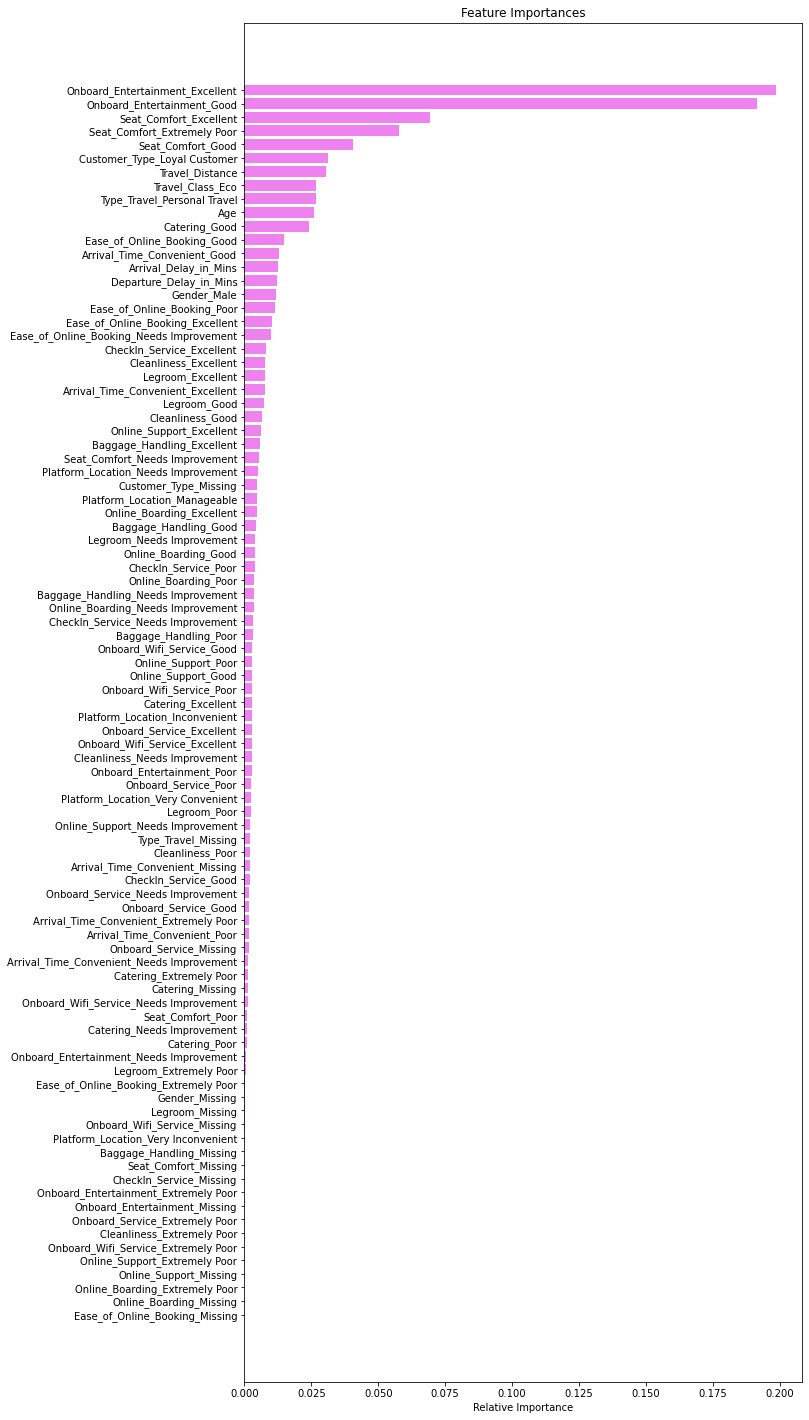

In [44]:
# Plotting the feature importance
def plot_importance(d_tree, data=X_train):
    features = list(data.columns)
    importances = d_tree.feature_importances_

    indices = np.argsort(importances)

    plt.figure(figsize = (10, 25))

    plt.title('Feature Importances')

    plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

    plt.yticks(range(len(indices)), [features[i] for i in indices])

    plt.xlabel('Relative Importance')

    plt.show()
    
plot_importance(d_tree)

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth to reduce overfitting of the model. We can tune some other hyperparameters as well.**

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.454083, 1: 0.545917} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [45]:
import multiprocessing

# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.545917, 1: 0.454083})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(10, 20, 30), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [20, 40, 60, 100, 150]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

n_cpus = multiprocessing.cpu_count()
# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5, n_jobs=n_cpus)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.545917, 1: 0.454083}, max_depth=10,
                       min_samples_leaf=150, random_state=1)

In [46]:
# Fitting the decision tree classifier on the training data
d_tree_tuned =  DecisionTreeClassifier(class_weight={0: 0.545917, 1: 0.454083}, max_depth=10, min_samples_leaf=150, random_state=1)

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.545917, 1: 0.454083}, max_depth=10,
                       min_samples_leaf=150, random_state=1)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

              precision    recall  f1-score   support

           0      0.894     0.909     0.901     29999
           1      0.923     0.910     0.917     36066

    accuracy                          0.910     66065
   macro avg      0.909     0.910     0.909     66065
weighted avg      0.910     0.910     0.910     66065



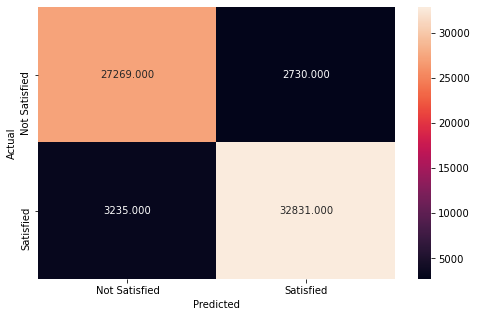

In [47]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0      0.893     0.909     0.901     12787
           1      0.924     0.910     0.917     15527

    accuracy                          0.910     28314
   macro avg      0.908     0.910     0.909     28314
weighted avg      0.910     0.910     0.910     28314



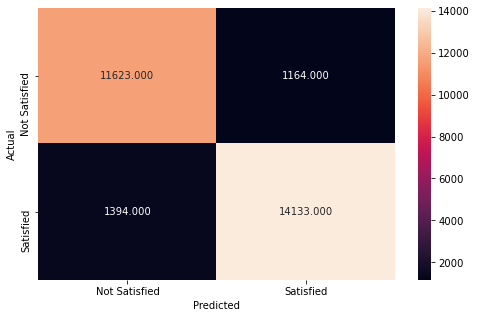

In [48]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Observations:**

- The performance for training and testing didn't improve and both performed worse.

**Let's visualize the tuned decision tree** and observe the decision rules:

In [50]:
to_drop, to_keep = show_importance(d_tree_tuned, 0.001)
to_drop.index.astype(str).values

                                               Imp
Onboard_Entertainment_Excellent           0.286483
Onboard_Entertainment_Good                0.248925
Seat_Comfort_Excellent                    0.087596
Seat_Comfort_Extremely Poor               0.075116
Seat_Comfort_Good                         0.051790
...                                            ...
Seat_Comfort_Needs Improvement            0.000000
Ease_of_Online_Booking_Missing            0.000000
Ease_of_Online_Booking_Needs Improvement  0.000000
Catering_Extremely Poor                   0.000000
Online_Boarding_Poor                      0.000000

[91 rows x 1 columns]
0 importance features:


array(['Cleanliness_Needs Improvement', 'Catering_Excellent',
       'Arrival_Time_Convenient_Excellent', 'Cleanliness_Good',
       'Arrival_Time_Convenient_Missing', 'Online_Support_Good',
       'Onboard_Service_Good', 'Type_Travel_Missing',
       'Baggage_Handling_Needs Improvement', 'Onboard_Wifi_Service_Poor',
       'Onboard_Service_Missing', 'Platform_Location_Needs Improvement',
       'Onboard_Wifi_Service_Excellent', 'Baggage_Handling_Excellent',
       'Online_Boarding_Excellent', 'Onboard_Service_Poor',
       'Cleanliness_Extremely Poor', 'Legroom_Extremely Poor',
       'Customer_Type_Missing', 'Legroom_Missing',
       'Legroom_Needs Improvement', 'Legroom_Poor',
       'CheckIn_Service_Poor', 'CheckIn_Service_Needs Improvement',
       'Baggage_Handling_Missing', 'Online_Boarding_Extremely Poor',
       'Baggage_Handling_Poor', 'Online_Boarding_Missing',
       'Gender_Missing', 'CheckIn_Service_Good',
       'CheckIn_Service_Missing', 'Onboard_Service_Needs Improveme

**Let's look at the feature importance** of the tuned decision tree model

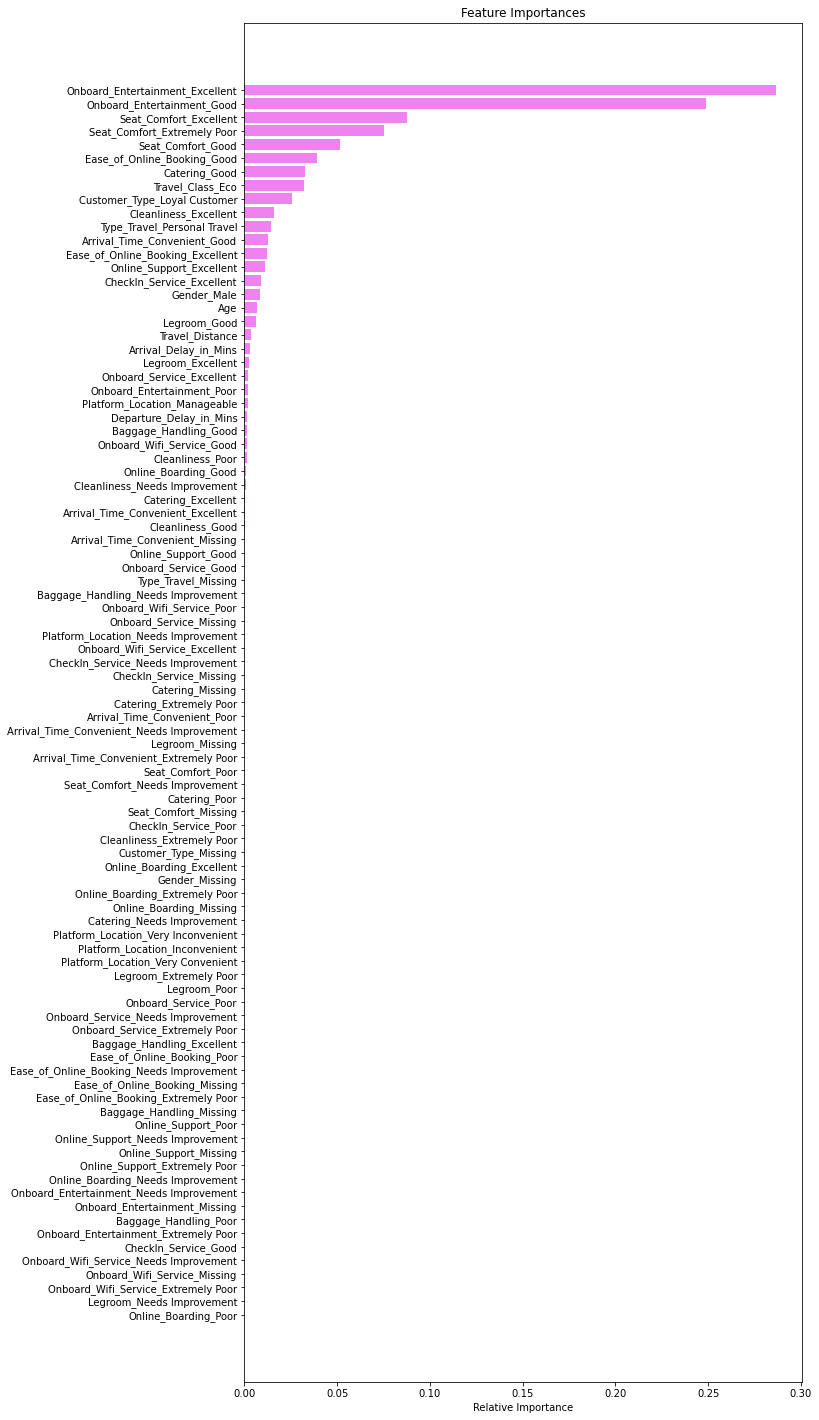

In [51]:
plot_importance(d_tree_tuned)

### **Random Forest Classifier**

In [52]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(class_weight={0: 0.545917, 1: 0.454083}, random_state=1, criterion='entropy')

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.545917, 1: 0.454083},
                       criterion='entropy', random_state=1)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     29999
           1      1.000     1.000     1.000     36066

    accuracy                          1.000     66065
   macro avg      1.000     1.000     1.000     66065
weighted avg      1.000     1.000     1.000     66065



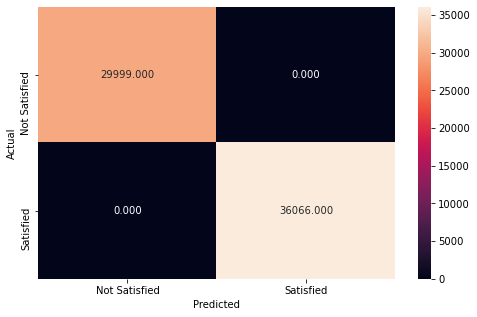

In [53]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0      0.932     0.952     0.942     12787
           1      0.960     0.943     0.951     15527

    accuracy                          0.947     28314
   macro avg      0.946     0.947     0.947     28314
weighted avg      0.947     0.947     0.947     28314



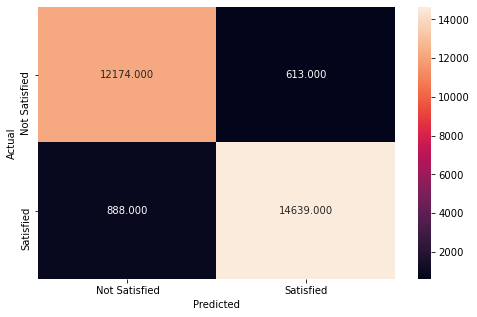

In [54]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

In [55]:
to_drop, to_keep = show_importance(rf_estimator, 0.01)
to_drop = to_drop.index.astype(str).values
X_train1 = X_train.drop(to_drop, axis=1)

                                              Imp
Onboard_Entertainment_Excellent      8.760977e-02
Seat_Comfort_Excellent               6.419194e-02
Onboard_Entertainment_Good           4.011302e-02
Travel_Distance                      3.810112e-02
Travel_Class_Eco                     3.513361e-02
...                                           ...
Online_Boarding_Missing              1.231080e-05
Platform_Location_Very Inconvenient  8.105432e-06
Onboard_Service_Extremely Poor       3.303417e-06
Online_Support_Extremely Poor        1.240812e-06
Cleanliness_Extremely Poor           2.333110e-07

[91 rows x 1 columns]
0 importance features:


### **Train again with Random Forest** 

In [57]:
# Fitting the random forest tree classifier on the training data
rf_estimator1 = RandomForestClassifier(random_state=1, criterion='entropy')

rf_estimator1.fit(X_train1, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     29999
           1      1.000     1.000     1.000     36066

    accuracy                          1.000     66065
   macro avg      1.000     1.000     1.000     66065
weighted avg      1.000     1.000     1.000     66065



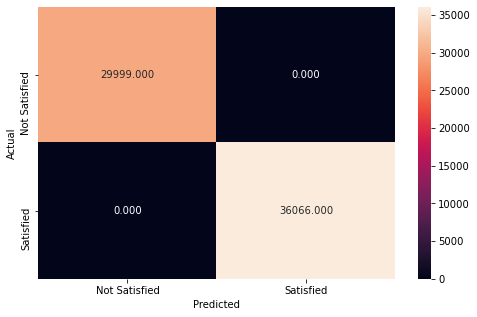

In [58]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0      0.932     0.952     0.942     12787
           1      0.960     0.943     0.951     15527

    accuracy                          0.947     28314
   macro avg      0.946     0.947     0.947     28314
weighted avg      0.947     0.947     0.947     28314



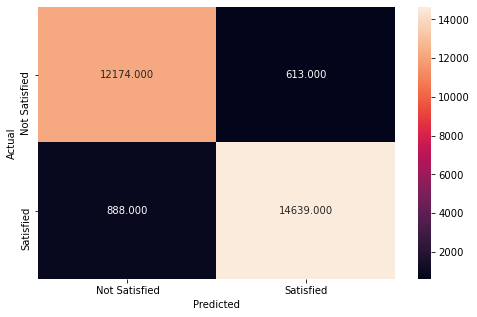

In [59]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [63]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 1, class_weight={0: 0.545917, 1: 0.454083})

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 200, 300],
              "max_depth": [9, 10, 11],
              "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

n_cpus = multiprocessing.cpu_count()
# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5, verbose=2, n_jobs=n_cpus)

grid_obj = grid_obj.fit(X_train1, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [64]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train1, y_train)

RandomForestClassifier(class_weight={0: 0.545917, 1: 0.454083},
                       criterion='entropy', max_depth=11, max_features=0.8,
                       random_state=1)

              precision    recall  f1-score   support

           0      0.907     0.962     0.934     29999
           1      0.967     0.918     0.942     36066

    accuracy                          0.938     66065
   macro avg      0.937     0.940     0.938     66065
weighted avg      0.939     0.938     0.938     66065



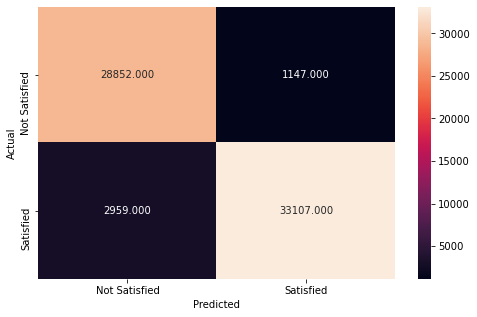

In [65]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train1)

metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0      0.932     0.952     0.942     12787
           1      0.960     0.943     0.951     15527

    accuracy                          0.947     28314
   macro avg      0.946     0.947     0.947     28314
weighted avg      0.947     0.947     0.947     28314



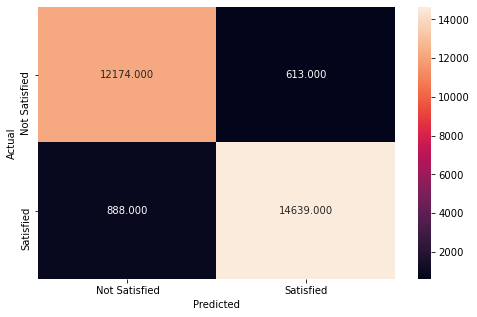

In [66]:
# Checking performance on the testing data
y_pred_test4 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test4)

### **Adaptive Boosting Model**

In [69]:
from sklearn.ensemble import AdaBoostClassifier

# Fitting with Adaptive Boosting on top of random forest tree classifier on the training data
base = RandomForestClassifier(random_state=1, criterion='entropy')
adaboost = AdaBoostClassifier(base_estimator=base, n_estimators=300, random_state=1)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         random_state=1),
                   n_estimators=300, random_state=1)

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     29999
           1      1.000     1.000     1.000     36066

    accuracy                          1.000     66065
   macro avg      1.000     1.000     1.000     66065
weighted avg      1.000     1.000     1.000     66065



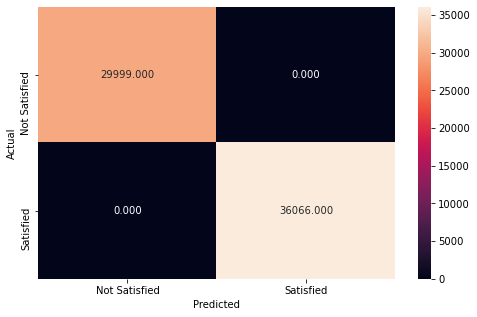

In [70]:
# Checking performance on the training data
y_pred_train5 = adaboost.predict(X_train)

metrics_score(y_train, y_pred_train5)

              precision    recall  f1-score   support

           0      0.932     0.953     0.942     12787
           1      0.961     0.943     0.952     15527

    accuracy                          0.947     28314
   macro avg      0.946     0.948     0.947     28314
weighted avg      0.948     0.947     0.948     28314



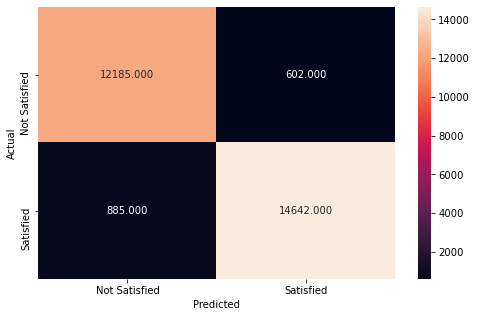

In [71]:
# Checking performance on the training data
y_pred_train5 = adaboost.predict(X_test)

metrics_score(y_test, y_pred_train5)

### **Adaptive Boost with Hyperspace tuning**

In [72]:
param_grid = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.01, 0.1, 1, 1.1],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada = AdaBoostClassifier()

n_cpus = multiprocessing.cpu_count()
# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(ada, param_grid, cv=5, n_jobs=n_cpus)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 300}
Best score:  0.9004768031484145


In [73]:
# Create a new AdaBoostClassifier with the best hyperparameters
best_ada = AdaBoostClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                              learning_rate=grid_search.best_params_['learning_rate'], 
                              algorithm=grid_search.best_params_['algorithm'])

# Fit the new AdaBoostClassifier with the best hyperparameters
best_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=300)

              precision    recall  f1-score   support

           0      0.886     0.895     0.891     12787
           1      0.913     0.905     0.909     15527

    accuracy                          0.901     28314
   macro avg      0.900     0.900     0.900     28314
weighted avg      0.901     0.901     0.901     28314



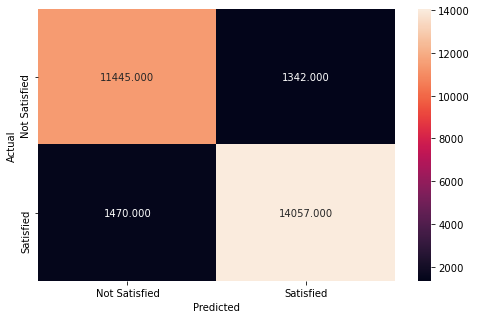

In [74]:
# Checking performance on the training data
y_pred_train5 = best_ada.predict(X_test)

metrics_score(y_test, y_pred_train5)

### **Hyperspace search for XGBoost**

In [75]:
# Splitting the data into train and test sets
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_train, y_train, test_size = 0.15, random_state = 1)

In [76]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import log_loss
import xgboost as xgb


# Define the objective function for hyperopt
def objective(params):
    # Load the training data
    dtrain = xgb.DMatrix(X_train10, label=y_train10)

    # Set the XGBoost parameters
    xgb_params = {
        'learning_rate': params['learning_rate'],
        'max_depth': int(params['max_depth']),
        'subsample': params['subsample'],
        'gamma': params['gamma'],
        'colsample_bytree': params['colsample_bytree'],
        'objective': 'binary:logistic',
        'nthread': -1,
        'seed': 7
    }

    # Train the XGBoost model
    model = xgb.train(xgb_params, dtrain)

    # Make predictions on the test set
    dtest = xgb.DMatrix(X_test10)
    y_pred = model.predict(dtest)

    # Compute the log loss
    loss = log_loss(y_test10, y_pred)

    return {'loss': loss, 'status': STATUS_OK}

# Define the hyperparameters to search over
space = {
    'n_estimators': 300,
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.4),
    'max_depth': hp.quniform('max_depth', 2, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}

# Set up the hyperparameter search
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
best

100%|██████████| 100/100 [00:46<00:00,  2.16trial/s, best loss: 0.14404976007812417]


{'colsample_bytree': 0.9992932801443278,
 'gamma': 0.026412275957422827,
 'learning_rate': 0.3879098031851265,
 'max_depth': 10.0,
 'subsample': 0.9814624742539757}

In [77]:
xgb_params = {
        'n_estimators': 300,
        'learning_rate': best['learning_rate'],
        'max_depth': int(best['max_depth']),
        'subsample': best['subsample'],
        'gamma': best['gamma'],
        'colsample_bytree': best['colsample_bytree'],
        'objective': 'binary:logistic',
        'nthread': -1,
        'seed': 7
}

xgb_model = xgb.XGBRegressor(**xgb_params)
xgb_model.fit(X_train10, y_train10)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9992932801443278, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.026412275957422827, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3879098031851265, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, nthread=-1, num_parallel_tree=None,
             objective='binary:logistic', ...)

              precision    recall  f1-score   support

           0      0.943     0.953     0.948      4496
           1      0.960     0.952     0.956      5414

    accuracy                          0.952      9910
   macro avg      0.952     0.952     0.952      9910
weighted avg      0.952     0.952     0.952      9910



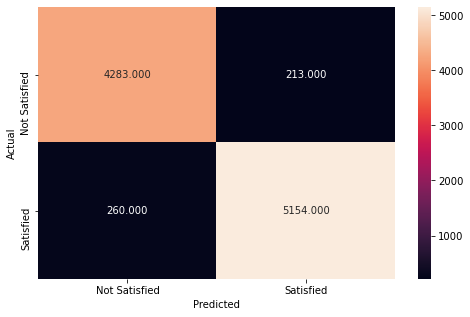

In [78]:
y_pred_train7 = xgb_model.predict(X_test10)
y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred_train7]
metrics_score(y_test10, y_pred_binary)

### **CatBoost**

In [80]:
%%capture
pd.set_option('display.max_rows', 20)

In [81]:
#import libraries
from sklearn import datasets
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
# load data

#Instantiate CatBoostClassifier
cbc = CatBoostClassifier(verbose=0)

#create the grid
grid = {'max_depth': [5, 9, 10, 12],'n_estimators':[100, 300, 500, 700]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000239820E81C0>,
             param_grid={'max_depth': [5, 9, 10, 12],
                         'n_estimators': [100, 300, 500, 700]},
             scoring='accuracy')

In [82]:
#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

0.9547718156361158
{'max_depth': 9, 'n_estimators': 700}


              precision    recall  f1-score   support

           0      0.944     0.961     0.953     12787
           1      0.967     0.953     0.960     15527

    accuracy                          0.957     28314
   macro avg      0.956     0.957     0.956     28314
weighted avg      0.957     0.957     0.957     28314



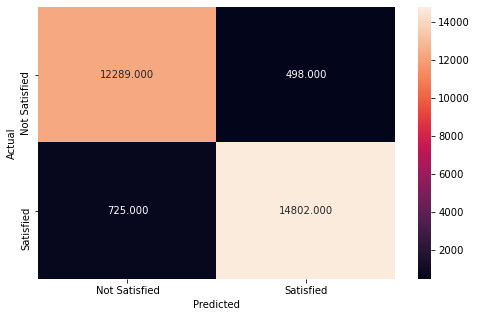

In [83]:
# Checking performance on the testing data
y_pred_test12 = gscv.predict(X_test)

metrics_score(y_test, y_pred_test12)

In [84]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the CatBoost classifier with a learning rate of 0.1
clf = CatBoostClassifier(max_depth=11, learning_rate=0.0752)

# Fit the classifier to the training data
clf.fit(X_train, y_train, verbose=False)

              precision    recall  f1-score   support

           0      0.943     0.959     0.951     12787
           1      0.966     0.952     0.959     15527

    accuracy                          0.955     28314
   macro avg      0.954     0.955     0.955     28314
weighted avg      0.955     0.955     0.955     28314



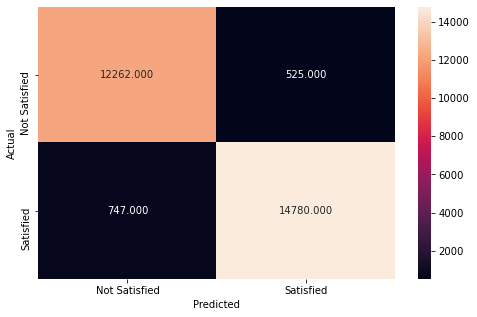

In [85]:
# Checking performance on the testing data
y_pred_test7 = clf.predict(X_test)

metrics_score(y_test, y_pred_test7)

 **Observations:**

* The best performer is when max_depth=9, accuracy: 0.955
* Now let see if we can get a better fit using higher order terms of the features.

### **CatBoost Randomized search**

In [89]:
to_drop, to_keep = show_importance(clf, 0, data=X)
to_drop = to_drop.index.to_numpy()
X_small = X.drop(to_drop, axis=1)

                                              Imp
Type_Travel_Personal Travel          6.013163e+00
Seat_Comfort_Good                    5.613626e+00
Seat_Comfort_Excellent               5.592323e+00
Gender_Male                          5.144815e+00
Onboard_Entertainment_Excellent      4.774701e+00
...                                           ...
Onboard_Entertainment_Missing        4.807556e-07
Onboard_Service_Extremely Poor       0.000000e+00
Cleanliness_Extremely Poor           0.000000e+00
Onboard_Wifi_Service_Extremely Poor  0.000000e+00
Online_Support_Extremely Poor        0.000000e+00

[91 rows x 1 columns]
0 importance features:


In [92]:
from scipy.stats import randint as sp_randint
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'learning_rate': [0.07, 0.08, 0.09, 0.1],
    'l2_leaf_reg': [1, 2, 3],
    'max_depth': sp_randint(9, 13),
    'n_estimators': sp_randint(100, 400)
}

# Create the CatBoostClassifier
cat = CatBoostClassifier()

n_cpus = multiprocessing.cpu_count()
# Perform random search cross-validation to find the best hyperparameters
random_search = RandomizedSearchCV(cat, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=n_cpus)
random_search.fit(X_train, y_train)

#returns the estimator with the best performance
print(random_search.best_estimator_)

#returns the best score
print(random_search.best_score_)

#returns the best parameters
print(random_search.best_params_)

0:	learn: 0.5921917	total: 23ms	remaining: 8.19s
1:	learn: 0.5138669	total: 48.1ms	remaining: 8.55s
2:	learn: 0.4553138	total: 72.3ms	remaining: 8.54s
3:	learn: 0.4058230	total: 97.3ms	remaining: 8.59s
4:	learn: 0.3739738	total: 122ms	remaining: 8.61s
5:	learn: 0.3487531	total: 147ms	remaining: 8.61s
6:	learn: 0.3260324	total: 172ms	remaining: 8.58s
7:	learn: 0.3088269	total: 198ms	remaining: 8.63s
8:	learn: 0.2950335	total: 224ms	remaining: 8.65s
9:	learn: 0.2778919	total: 249ms	remaining: 8.64s
10:	learn: 0.2689715	total: 274ms	remaining: 8.62s
11:	learn: 0.2542400	total: 310ms	remaining: 8.9s
12:	learn: 0.2452002	total: 334ms	remaining: 8.84s
13:	learn: 0.2369263	total: 359ms	remaining: 8.8s
14:	learn: 0.2306053	total: 389ms	remaining: 8.88s
15:	learn: 0.2252744	total: 414ms	remaining: 8.83s
16:	learn: 0.2198312	total: 441ms	remaining: 8.81s
17:	learn: 0.2145502	total: 465ms	remaining: 8.76s
18:	learn: 0.2098523	total: 493ms	remaining: 8.77s
19:	learn: 0.2060075	total: 521ms	remaini

162:	learn: 0.0916615	total: 4.3s	remaining: 5.12s
163:	learn: 0.0915793	total: 4.32s	remaining: 5.09s
164:	learn: 0.0914019	total: 4.35s	remaining: 5.06s
165:	learn: 0.0911613	total: 4.37s	remaining: 5.03s
166:	learn: 0.0907861	total: 4.4s	remaining: 5s
167:	learn: 0.0904893	total: 4.42s	remaining: 4.98s
168:	learn: 0.0903043	total: 4.45s	remaining: 4.95s
169:	learn: 0.0900497	total: 4.48s	remaining: 4.92s
170:	learn: 0.0898438	total: 4.54s	remaining: 4.93s
171:	learn: 0.0896451	total: 4.56s	remaining: 4.91s
172:	learn: 0.0895636	total: 4.58s	remaining: 4.88s
173:	learn: 0.0892408	total: 4.61s	remaining: 4.85s
174:	learn: 0.0889668	total: 4.63s	remaining: 4.82s
175:	learn: 0.0889416	total: 4.66s	remaining: 4.79s
176:	learn: 0.0886433	total: 4.68s	remaining: 4.76s
177:	learn: 0.0883455	total: 4.71s	remaining: 4.74s
178:	learn: 0.0881679	total: 4.73s	remaining: 4.71s
179:	learn: 0.0879543	total: 4.76s	remaining: 4.68s
180:	learn: 0.0877508	total: 4.78s	remaining: 4.65s
181:	learn: 0.087

325:	learn: 0.0651025	total: 8.47s	remaining: 805ms
326:	learn: 0.0650313	total: 8.49s	remaining: 779ms
327:	learn: 0.0649500	total: 8.52s	remaining: 753ms
328:	learn: 0.0647560	total: 8.54s	remaining: 727ms
329:	learn: 0.0646326	total: 8.57s	remaining: 701ms
330:	learn: 0.0645440	total: 8.59s	remaining: 675ms
331:	learn: 0.0643894	total: 8.62s	remaining: 649ms
332:	learn: 0.0642552	total: 8.64s	remaining: 623ms
333:	learn: 0.0640802	total: 8.67s	remaining: 597ms
334:	learn: 0.0639688	total: 8.7s	remaining: 572ms
335:	learn: 0.0639316	total: 8.73s	remaining: 546ms
336:	learn: 0.0637940	total: 8.75s	remaining: 519ms
337:	learn: 0.0637301	total: 8.78s	remaining: 493ms
338:	learn: 0.0636917	total: 8.8s	remaining: 467ms
339:	learn: 0.0636145	total: 8.83s	remaining: 442ms
340:	learn: 0.0635200	total: 8.86s	remaining: 416ms
341:	learn: 0.0634261	total: 8.88s	remaining: 389ms
342:	learn: 0.0633286	total: 8.9s	remaining: 364ms
343:	learn: 0.0630984	total: 8.93s	remaining: 338ms
344:	learn: 0.0

In [93]:
cat = CatBoostClassifier(learning_rate=0.08, l2_leaf_reg=3, max_depth=9, n_estimators=357)
cat.fit(X_train, y_train, verbose=False)

              precision    recall  f1-score   support

           0      0.944     0.960     0.952     12787
           1      0.967     0.953     0.960     15527

    accuracy                          0.956     28314
   macro avg      0.956     0.957     0.956     28314
weighted avg      0.957     0.956     0.957     28314



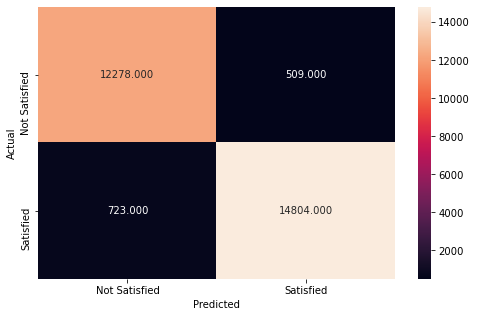

In [94]:
# Checking performance on the testing data
y_pred_test7 = cat.predict(X_test)
metrics_score(y_test, y_pred_test7)